## Assignment 2

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('http://bit.ly/PGGM_dataset')

**Define a function that takes the dataset and creates a DataFrame which columns are:
‘Variable’, ‘Number of Nulls’, ‘Percentage of Nulls’**

In [5]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1).reset_index()
        mis_val_table = mis_val_table.rename(
            columns = {'index':'Variable', 0 : 'Number of Nulls', 1 : 'Percentage of Nulls'})
        return mis_val_table

In [6]:
missing_values_table(data)

,Variable,Number of Nulls,Percentage of Nulls
0,Identifier,0,0.000000
1,Name,0,0.000000
2,Period,0,0.000000
3,Period_YYYYMMDD,0,0.000000
4,Ticker,0,0.000000
5,Universe_Returns_F1W,4,0.010443
6,Universe_Returns_F4W,8,0.020886
7,Universe_Returns_F12W,36,0.093985
8,Weight,0,0.000000
9,GICS_Sector,0,0.000000


**Create a function that replaces all the occurrences of the string “Inc.” for the string
“B.V.” in any given vector.**

In [115]:
def find_replace(l, cases):
    for a, b in cases:
        l = [row.replace(a, b) for row in l]
    return l

In [119]:
cases ={
    ('Inc.','B.V.'),
    ('blue','Blue'),
    ('.',''),
    ('I','Y'),
    ('-','')
    }

In [121]:
#find_replace(data.Name, cases)

**Include a new variable in the dataset that corresponds the quarter of the year.**

In [14]:
data['Quarter'] = pd.PeriodIndex(data.Period, freq='Q-MAR').strftime('Q%q')

In [114]:
'Year '+str(data.year[0])

'Year 2014'

**Create a subset where the columns are the Quarter of the year, and Industry Group
the Rows, agregating by ROA. Is there any pattern? Export the subset in csv.**

In [122]:
quarter_group = pd.pivot_table(data, values='LTM_ROA', index='GICS_Ind_Grp', columns='Quarter', 
                               aggfunc='mean',fill_value=0).T

In [125]:
#quarter_group.T

In [126]:
quarter_group = quarter_group[quarter_group.mean().sort_values(ascending=False).index]

In [129]:
quarter_group

GICS_Ind_Grp,Semiconductors & Semiconductor Equipment,Consumer Services,Transportation,Household & Personal Products,Food Beverage & Tobacco,Retailing,Commercial & Professional Services,Capital Goods,Consumer Durables & Apparel,Food & Staples Retailing,...,Diversified Financials,Media,Automobiles & Components,Pharmaceuticals Biotechnology & Life Sciences,Real Estate,Utilities,Energy,Insurance,Media & Entertainment,Banks
Quarter,,,,,,,,,,,,,,,,,,,,,
Q1,11.589568,12.237632,11.371819,10.369939,9.985385,9.656272,8.240517,7.035379,6.009177,6.048261,...,5.139919,4.755386,3.756846,1.711677,3.001839,2.506484,2.524588,1.956626,0.000000,1.018877
Q2,12.811544,13.037631,11.644001,10.813697,9.650519,10.234085,8.870785,7.358007,6.264084,7.050006,...,5.240579,4.732686,3.673743,4.313217,3.066965,2.541458,2.409214,2.048777,0.000000,1.087699
Q3,13.350461,12.741236,10.800704,10.599298,9.910466,9.887666,8.752008,7.586536,6.636719,6.750695,...,5.229576,4.797754,3.999376,5.021505,3.306205,2.408358,2.782611,2.310436,6.014303,1.108746
Q4,11.570475,11.183710,9.331235,10.199596,9.495991,9.208273,7.420434,7.159318,7.226165,5.922688,...,4.899855,4.657937,4.110035,1.847954,3.086908,2.282353,1.630256,1.806934,0.000000,0.989145


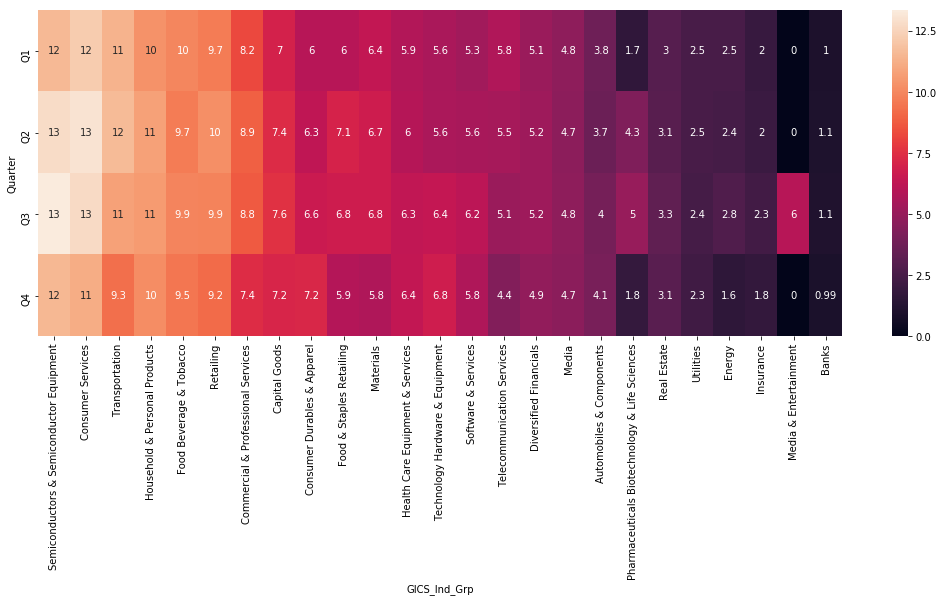

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,6))
sns.heatmap(quarter_group, annot=True, annot_kws={"size": 10})

** Create a subset where the original dataset is sorted by Market Cap USD and
determine which month has the highest value in the dataset.**

In [65]:
data.Period = [pd.to_datetime(i, format='%Y%m%d') for i in data.Period_YYYYMMDD]
data['month'] = [date.month for date in data.Period]
data['day'] = [date.day for date in data.Period]
data['year'] = [date.year for date in data.Period]

In [135]:
market_sorted = data.sort_values(by='Market_Cap_USD',ascending=False)
market_sorted = market_sorted.groupby(['year','month']).agg(['mean','count','max'])['Market_Cap_USD']

In [136]:
market_sorted

mean  count         max
year month                                 
2014 12     30610.662923    631   660940.75
2015 9      28112.869636    637   635441.60
2016 8      31952.329342    620   588280.25
     11     32266.540738    616   605365.00
2017 5      34772.696415    624   814564.10
     12     37684.622108   2532   900557.50
2018 1      39457.727861   3160   925092.30
     2      38283.681472   2528   920030.44
     3      38234.934084   2524   916166.60
     4      37676.186519   2524   913086.06
     5      38309.587983   3155   967099.00
     6      39193.988141   2511   984257.06
     7      39673.868663   2505   988519.20
     8      40611.186460   3130  1131403.40
     9      41077.593735   2502  1115097.40
     10     39412.431943   3120  1140656.10
     11     38757.069367   2493  1031933.25
     12     36547.138506   2492   853399.60

** Which of the overall Industry Group has the lowest 5 years sales growth in average**

In [82]:
df_ind_grp = data.groupby('GICS_Ind_Grp').mean()['5Y_Sales_Growth'].sort_values().reset_index()

In [138]:
#df_ind_grp

<BarContainer object of 25 artists>

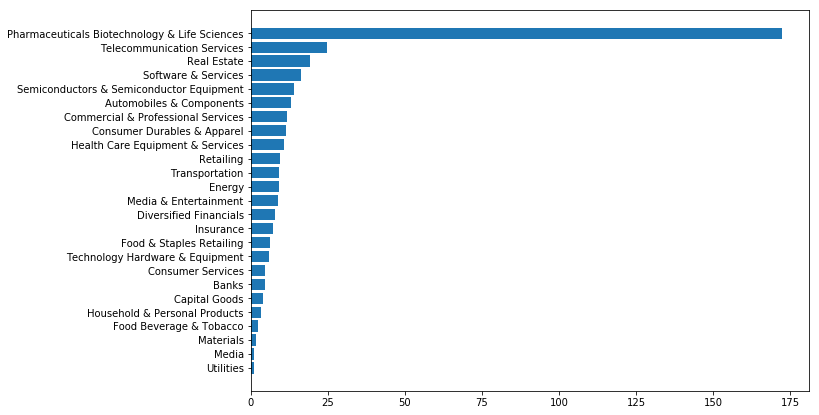

In [83]:
plt.figure(figsize=(10,7))
plt.barh(df_ind_grp.GICS_Ind_Grp,df_ind_grp['5Y_Sales_Growth'])

** Create a subset of the portfolio which includes all the values where Universe Returns
indexes higher than the 75 percentile.** 

In [147]:
summary = data.describe().loc['75%', 
                              ['Universe_Returns_F1W','Universe_Returns_F4W','Universe_Returns_F12W']]

In [142]:
my_summary = data.describe()

In [146]:
my_summary.loc['75%','5Y_Sales_Growth']

11.886979

In [148]:
summary

Universe_Returns_F1W     2.159980
Universe_Returns_F4W     4.400995
Universe_Returns_F12W    6.686374
Name: 75%, dtype: float64

In [150]:
universe_returns_75perc = data[(data.Universe_Returns_F1W > summary.Universe_Returns_F1W) &
     (data.Universe_Returns_F4W > 4) &
     (data.Universe_Returns_F12W > summary.Universe_Returns_F12W)
    ]

In [149]:
summary.Universe_Returns_F4W

4.400995

In [99]:
universe_returns_75perc.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,...,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,Quarter,month,day,year
12,26441150,Duke Realty Corporation,2014-12-31,20141231,DRE-US,4.504955,10.396028,8.271610,0.000357,Financials,...,20.200000,0.004120,3.146236,0.412802,0.033050,-0.216620,Q3,12,31,2014
20,10113710,Boston Scientific Corporation,2014-12-31,20141231,BSX-US,5.886793,10.113203,32.226418,0.000909,Health Care,...,13.250000,0.068196,1.712502,0.380982,0.016075,-2.550075,Q3,12,31,2014
29,22822V10,Crown Castle International Corp,2014-12-31,20141231,CCI-US,2.287173,10.749685,8.567882,0.001360,Financials,...,78.700000,0.016823,1.204316,0.260514,0.006607,16.179829,Q3,12,31,2014
70,61174X10,Monster Beverage Corporation,2014-12-31,20141231,MNST-US,7.023537,10.023081,25.542223,0.000797,Consumer Staples,...,36.116666,0.029585,25.717973,0.076293,0.023072,16.936647,Q3,12,31,2014
79,25339310,"Dick's Sporting Goods, Inc.",2014-12-31,20141231,DKS-US,10.795557,10.473310,16.739559,0.000248,Consumer Discretionary,...,49.650000,0.063510,9.346824,0.285530,0.053575,8.519749,Q3,12,31,2014


** Create a function that can label any given vector in a dicotomic way: above the
median and below the median.** 

In [106]:
def dicotomic_label(vector):
    """Creates a dicotomic label 
    1: Above the median
    0: Below the median"""
    label = []
    for i in vector:
        if i >= vector.median():
            label.append(1)
        else:
            label.append(0)
    return label

In [107]:
dicotomic_label?

Signature: dicotomic_label(vector)
Docstring:
Creates a dicotomic label 
1: Above the median
0: Below the median
File:      ~/data-science-bootcamp-pggm/notebooks/<ipython-input-106-5217586d257c>
Type:      function


In [109]:
data['Above_median'] = dicotomic_label(data.Weight)

In [155]:
data['flag_dollars'] = dicotomic_label(data.Price_USD)

In [156]:
data[data.flag_dollars == 1]

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,...,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,Quarter,month,day,year,Above_median,flag_dollars
0,17290810,Cintas Corporation,2014-12-31,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,...,9.089989,0.246962,0.042708,4.718765,Q3,12,31,2014,0,1
2,50241310,L-3 Communications Holdings Inc.,2014-12-31,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,...,4.744629,0.570099,0.059821,-4.316938,Q3,12,31,2014,0,1
3,91301710,United Technologies Corporation,2014-12-31,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,...,6.805052,0.325584,0.059088,3.083364,Q3,12,31,2014,1,1
7,03662Q10,"ANSYS, Inc.",2014-12-31,20141231,ANSS-US,-2.792686,-0.493902,5.390239,0.000391,Information Technology,...,9.653068,0.303087,0.033780,12.523060,Q3,12,31,2014,0,1
9,29444U70,"Equinix, Inc.",2014-12-31,20141231,EQIX-US,-2.902132,-4.247337,1.677120,0.000624,Information Technology,...,1.895395,0.202957,0.011752,23.247128,Q3,12,31,2014,0,1
10,53983010,Lockheed Martin Corporation,2014-12-31,20141231,LMT-US,-0.903571,-1.724052,4.119432,0.002690,Industrials,...,8.433544,0.075166,0.051358,0.396690,Q3,12,31,2014,1,1
11,91390310,"Universal Health Services, Inc. Class B",2014-12-31,20141231,UHS-US,0.656116,-5.015284,6.134164,0.000529,Health Care,...,5.739033,0.328066,0.044490,7.782109,Q3,12,31,2014,0,1
13,93142710,Walgreens Boots Alliance Inc,2014-12-31,20141231,WBA-US,0.524938,-3.188980,13.186550,0.003585,Consumer Staples,...,5.316529,0.283966,0.026247,3.630590,Q3,12,31,2014,1,1
16,00825210,"Affiliated Managers Group, Inc.",2014-12-31,20141231,AMG-US,-4.212213,-3.123826,0.777423,0.000610,Financials,...,6.713888,0.223984,0.037055,18.739765,Q3,12,31,2014,0,1
17,92904210,Vornado Realty Trust,2014-12-31,20141231,VNO-US,4.655516,6.146598,4.173279,0.001029,Financials,...,0.470900,0.236906,0.000643,-0.413458,Q3,12,31,2014,1,1


** Create an excel file which contains 3 different sheets respectively for 2016, 2017,2018. Each including the same combination of the portfolio. The portfolio should be
equally represented by all sectors. **

In [ ]:
excelbook = pd.ExcelWriter('portfolio.xlsx')

In [ ]:
.to_excel(excelbook, 'sheet1')
.to_excel(excelbook, 'sheet2')
.to_excel(excelbook, 'sheet2')
excelbook.save()

** Create a story in a notebook that reports the Data Exploration of the dataset **